<a href="https://colab.research.google.com/github/Satyajit99p/Sarcasm-Detector/blob/main/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ORGANISING THE DATA

In [3]:
import json

news=[]
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    news.append(json.loads(line))

sentences=[]
labels=[]
urls=[]
for item in news:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [4]:
sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

In [27]:
print(len(sentences))
print(len(labels))

26709
26709


In [28]:
labels[7000]

1

In [6]:
urls[:5]

['https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb']

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer=Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index=tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded=pad_sequences(sequences,padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [10]:
print(sentences[0])

former versace store clerk sues over secret 'black code' for minority shoppers


DL MODEL 

In [60]:
import tensorflow as tf

vocab_size=1000
embedding_dim=16
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'
training_size=20000
max_length=100

In [61]:
training_sentences = sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [62]:
print(len(training_sentences))
print(len(training_labels))
print(len(testing_labels))
print(len(testing_labels))

20000
20000
6709
6709


In [63]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token = oov_tok, )
tokenizer.fit_on_texts(training_sentences)

word_index=tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padde = pad_sequences(training_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padde = pad_sequences(testing_sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)

In [64]:
print(len(training_labels))


20000


In [65]:
#code to convert data to work with tensorflow 2.x

import numpy as np
training_padded=np.array(training_padde)
training_labels=np.array(training_labels)
testing_padded=np.array(testing_padde)
testing_labels=np.array(testing_labels)

In [66]:
print(len(training_labels))
print(len(training_padded))

20000
20000


In [67]:
# generating sequential model

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           16000     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [69]:
print(len(training_labels))
print(len(training_padded))

20000
20000


In [70]:
#fitting our model

num_epochs=30
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6663 - accuracy: 0.5914 - val_loss: 0.5903 - val_accuracy: 0.6772
Epoch 2/30
625/625 - 1s - loss: 0.4796 - accuracy: 0.7814 - val_loss: 0.4343 - val_accuracy: 0.8015
Epoch 3/30
625/625 - 1s - loss: 0.4029 - accuracy: 0.8156 - val_loss: 0.4122 - val_accuracy: 0.8094
Epoch 4/30
625/625 - 1s - loss: 0.3803 - accuracy: 0.8271 - val_loss: 0.4124 - val_accuracy: 0.8080
Epoch 5/30
625/625 - 1s - loss: 0.3691 - accuracy: 0.8327 - val_loss: 0.4071 - val_accuracy: 0.8077
Epoch 6/30
625/625 - 1s - loss: 0.3637 - accuracy: 0.8347 - val_loss: 0.4045 - val_accuracy: 0.8110
Epoch 7/30
625/625 - 1s - loss: 0.3593 - accuracy: 0.8363 - val_loss: 0.4087 - val_accuracy: 0.8089
Epoch 8/30
625/625 - 1s - loss: 0.3563 - accuracy: 0.8372 - val_loss: 0.4031 - val_accuracy: 0.8162
Epoch 9/30
625/625 - 1s - loss: 0.3558 - accuracy: 0.8392 - val_loss: 0.4030 - val_accuracy: 0.8123
Epoch 10/30
625/625 - 1s - loss: 0.3529 - accuracy: 0.8383 - val_loss: 0.4335 - val_accuracy: 0.8006

In [71]:
# we can adjust the vocab_size attriubute in order to balance out the validation loss and actual loss.
# increasing the vocab size too high will lead to overfitting and high validation loss.
# decreasing the vocal_size too low will lead to unerfitting and low accuracy.

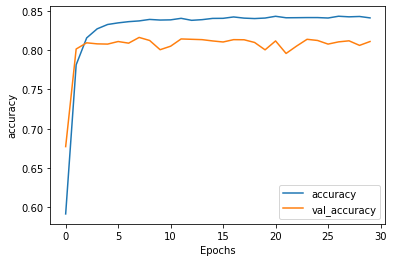

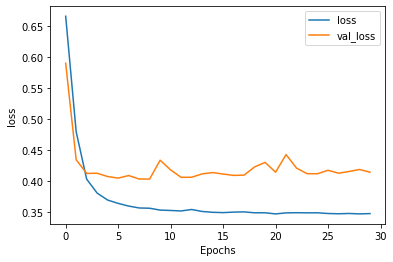

In [72]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [73]:
# try our model

sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.34277636]
 [0.566089  ]]
